In [23]:
import pandas as pd
import numpy as np

ufos = pd.read_csv('./data/ufos.csv')
ufos.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.200000,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611


In [24]:
ufos = pd.DataFrame({'Seconds' : ufos['duration (seconds)'],
                     'Country' : ufos['country'],
                     'Latitude' : ufos['latitude'],
                     'Longitude' : ufos['longitude']
                     })

ufos.Country.unique()

array(['us', nan, 'gb', 'ca', 'au', 'de'], dtype=object)

In [25]:
ufos.dropna(inplace=True)

ufos = ufos[(ufos['Seconds'] >= 1) & (ufos['Seconds'] <= 60)]

ufos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25863 entries, 2 to 80330
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seconds    25863 non-null  float64
 1   Country    25863 non-null  object 
 2   Latitude   25863 non-null  float64
 3   Longitude  25863 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1010.3+ KB


In [26]:
from sklearn.preprocessing import LabelEncoder

ufos['Country'] = LabelEncoder().fit_transform(ufos['Country'])

print(ufos.head())

print(ufos.Country.value_counts())

    Seconds  Country   Latitude   Longitude
2      20.0        3  53.200000   -2.916667
3      20.0        4  28.978333  -96.645833
14     30.0        4  35.823889  -80.253611
23     60.0        4  45.582778 -122.352222
24      3.0        3  51.783333   -0.783333
Country
4    23612
1     1266
3      742
0      202
2       41
Name: count, dtype: int64


In [27]:
from sklearn.model_selection import train_test_split

Selected_features = ['Seconds', 'Latitude', 'Longitude']

X = ufos[Selected_features]
y = ufos['Country']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.82      0.23      0.36       250
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00       131
           4       0.96      1.00      0.98      4743

    accuracy                           0.96      5173
   macro avg       0.96      0.85      0.87      5173
weighted avg       0.96      0.96      0.95      5173

Predicted labels:  [4 4 4 ... 3 4 4]
Accuracy:  0.960371157935434


c:\Users\rgaraev\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
import pickle
model_filename = 'ufo-model.pkl'
pickle.dump(model, open(model_filename,'wb'))

model = pickle.load(open('ufo-model.pkl','rb'))
print(model.predict([[50,44,-12]]))


[1]


c:\Users\rgaraev\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: xlabel='Longitude', ylabel='Latitude'>

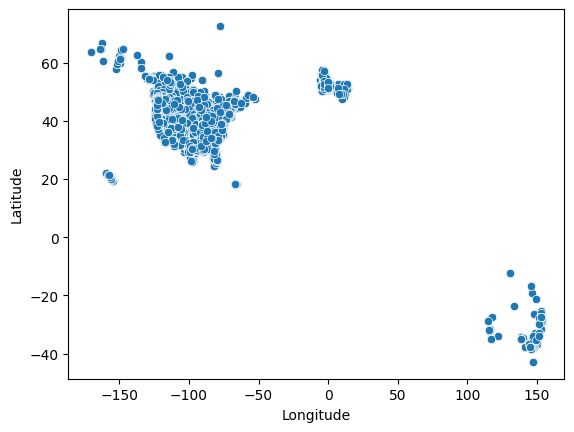

In [30]:
import seaborn as sns

sns.scatterplot(ufos, x=ufos['Longitude'], y=ufos['Latitude'])

<Axes: xlabel='Longitude', ylabel='Latitude'>

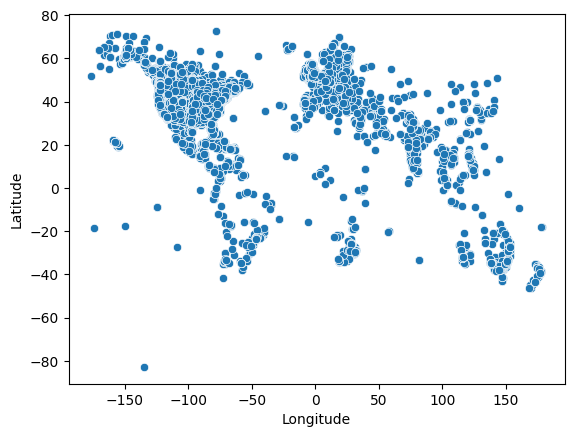

In [31]:
ufos_full = pd.read_csv('./data/ufos.csv')
ufos_full = pd.DataFrame({'Seconds' : ufos_full['duration (seconds)'],
                     'Country' : ufos_full['country'],
                     'Latitude' : ufos_full['latitude'],
                     'Longitude' : ufos_full['longitude']
                     })
ufos_full.dropna()
sns.scatterplot(ufos_full, x=ufos_full['Longitude'], y=ufos_full['Latitude'])

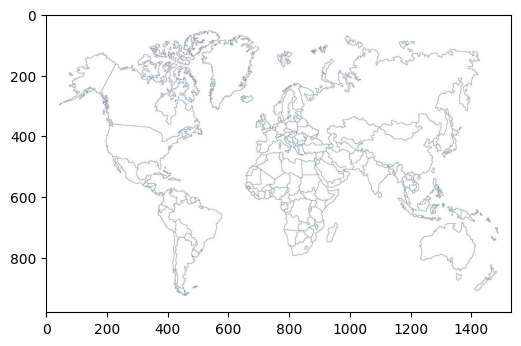

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import mpl_toolkits
from mpl_toolkits.basemap import Basemap
import pandas as pd

img = Image.open('images/map.jpg')

fig, ax = plt.subplot(figsize=(12,8))

m = Basemap
ax.imshow(img)
plt.show()
